In [1]:
import datetime
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
import copy
import datetime

import os
import random
import math
import matplotlib.patches as mpatches

In [20]:

#PART 1 - The KNN algorithm
#this function reads from  filepath and returns a pandas dataframe if .csv else returns filecontent 
def get_path(filetype):
  folder = None
  if filetype == "base":
    folder = os.getcwd() + '/a1_data/'
  if filetype == "bow":
    folder = os.getcwd() + '/a1_data/bow.csv'
  if filetype == "unique_words":
    folder = os.getcwd() + '/a1_data/unique_words.csv'
  if filetype == "unique_words_dict":
    folder = os.getcwd() + '/a1_data/unique_words_dict.csv'
  if filetype == "index_dict":
    folder = os.getcwd() + '/a1_data/index_dict.csv'
  if filetype == "knn_df_part1":
    folder = os.getcwd() + '/a1_data/knn_df_part1.csv'
  if filetype == "knn_df_part31":
    folder = os.getcwd() + '/a1_data/knn_df_part31.csv'
  if filetype == "knn_df_part32":
    folder = os.getcwd() + '/a1_data/knn_df_part32.csv'
  if filetype == "distance_matrix_df":
    folder = os.getcwd() + '/a1_data/distance_matrix_df.csv'
  if filetype == 'training_dataset':
    folder = os.getcwd() + '/a1_data/train.csv'
  if filetype == 'testing_dataset':
    folder = os.getcwd() + '/a1_data/test.csv'
  if filetype == 'stopwords':
    folder = os.getcwd() + '/a1_data/stop_words.txt'
  if filetype == 'processed_training_dataset_part1':
    folder = os.getcwd() + '/a1_data/processed_training_dataset_part1.csv'
  if filetype == 'processed_testing_dataset_part1':
    folder = os.getcwd() + '/a1_data/processed_testing_dataset_part1.csv'
  return folder


def create_index_dict_from_unique_words_dict(unique_words_dict):
  index_dict = {}
  for word in unique_words_dict:
    index = word2index(word,unique_words_dict)
    index_dict[word] = [index]
  return index_dict
def save_index_dict(index_dict):
  df = pd.DataFrame.from_dict(index_dict)
  path = get_path('base') + 'index_dict.csv'
  df.to_csv(path)
  print('index dict saved successfully at',path)

def load_index_df(path):
  index_df = read_file(path)
  return index_df
def convert_index_df_into_index_dict(index_df):
  index_dict = index_df.to_dict('series')
  return index_dict


def load_stopwords(stopword_filepath):
  stopword_list = read_file(stopword_filepath)
  stopwords = []
  for line in stopword_list:
    stopwords.append(line.strip())
  return stopwords
def load_dataset(dataset_filepath):
  training_dataset = read_file(dataset_filepath)
  return training_dataset

def read_file(filepath):
  file_content = None
  if '.csv' in filepath:
    file_content = pd.read_csv(filepath)
  if '.txt' in filepath:
    with open(filepath,'r') as f:
      file_content = f.readlines()
  return file_content

def remove_stopwords_from_dataset(dataset,stopwords):
  tweets = dataset['Tweet']
  stopless_tweets_list = []
  for tweet in tweets:
    split_tweet = [word.lower() for word in re.split("\W+",tweet) if word.lower() not in stopwords]
    empty_char = ' '
    stopless_tweet = empty_char.join(split_tweet)
    stopless_tweets_list.append(stopless_tweet)
  stopless_tweets_series = pd.Series(stopless_tweets_list)
  return stopless_tweets_series

def remove_numbers_from_dataset(dataset):
  tweets = dataset['Tweet']
  numless_tweets_list = []
  for tweet in tweets:
    numless_tweet =  re.sub(r'\d+','',tweet)
    numless_tweets_list.append(numless_tweet)
  numless_tweets_series = pd.Series(numless_tweets_list)
  return numless_tweets_series  

def remove_links_from_dataset(dataset):
  tweets = dataset['Tweet']
  linkless_tweets_list = []
  for tweet in tweets:
    linkless_tweet = re.sub(r'http\S+','',tweet)
    linkless_tweets_list.append(linkless_tweet)
  linkless_tweets_series = pd.Series(linkless_tweets_list)
  return linkless_tweets_series 
def preprocess_dataset(dataset):
  tweets = dataset['Tweet']
  stopwords_filepath = get_path('stopwords')
  stopwords = load_stopwords(stopwords_filepath)
  processed_dataset = dataset.copy()
  processed_dataset['Tweet'] = remove_links_from_dataset(dataset)
  # processed_dataset['Tweet'] = remove_numbers_from_dataset(dataset)
  processed_dataset['Tweet'] = remove_stopwords_from_dataset(dataset,stopwords)
  return processed_dataset
def create_corpus_from_tweets(tweets):
  corpus = ''
  for tweet in tweets:
    corpus = corpus + ' '+ tweet + ' '
  return corpus
def save_dataset(dataset,save_path):
  dataset.to_csv(save_path)
  print(save_path,'saved successfully')

def save_unique_words(unique_words,path):
  series = pd.Series(unique_words)
  series.to_csv(path)
  print('unique_words saved at', path)
def load_unique_words(path):
  unique_words = read_file(path)
  return unique_words
def create_vectors_of_tweets(no_of_vectors,unique_words):
  vectors = []
  # frequency_vector = create_frequency_vector_from_words(unique_words)
  for i in range(no_of_vectors):
    frequency_vector = {}
    for word in unique_words:
      frequency_vector[word] =  0
    vectors.append(frequency_vector)
  return vectors
def split_tweet_into_list_of_words(tweet):
  words = tweet.split()
  return words
def set_frequencies_for_bow_from_tweets(bow,tweets):
  t = len(bow)
  for i in range(t):
    l = len(bow[i])
    words = split_tweet_into_list_of_words(tweets[i])
    for word in words:
      bow[i][word] = bow[i][word] + 1
  return bow
def save_unique_words_dict(unique_words_dict):
  for key in unique_words_dict:
    unique_words_dict[key] = [0]
  df = pd.DataFrame.from_dict(unique_words_dict)
  path = get_path('base') + 'unique_words_dict.csv'
  df.to_csv(path)
  print('unique words dict saved successfully at',path)
def load_unique_words_df(path):
  df = read_file(path)
  df.rename({'Unnamed: 0': "useless0"}, axis="columns", inplace=True)

  df.drop(["useless0"], axis=1, inplace=True)

  print('loaded unique_words_dict at',path)
  return df
def load_bow(path):
  bow = read_file(path)
  return bow

def save_bow(bow):
  df = pd.DataFrame(bow)
  base = get_path('base')
  path = base + 'bow.csv'
  df.to_json(path)
  print('bow saved at',path)
def check_if_file_exists(path):
  if os.path.isfile(path):
    return True
  else:
    return False
def remove_empty_words_from_unique_words(unique_words):
  new_unique_words = []
  for word in unique_words:
    if word != '' or word != ' ':
      new_unique_words.append(word)
  return new_unique_words
def convert_unique_words_into_dict(unique_words):
  unique_words_dict = {}
  for word in unique_words:
    unique_words_dict[word] = 0
  return unique_words_dict
def convert_unique_words_df_into_unique_words_dict(unique_words_df):
  unique_words_dict = unique_words_df.to_dict('series')
  return unique_words_dict


def word2index(word,unique_words_dict):
  index = 0 
  for key in unique_words_dict:
    if key == word:
      break
    index = index + 1
  if index == len(unique_words_dict):
    index = -1
  # search_key = word
  # index = list (unique_words_dict.keys()).index(search_key)
  # print(index)

  return index


def create_bow_for_tweet(tweet,index_dict):
  bow = create_bow_for_tweets([tweet],index_dict)
  return bow




    
def create_bow_for_tweets(tweets,index_dict):
  length_of_columns = len(index_dict)
  length_of_rows = len(tweets)
  tweet_id =  0
  bow = []
  for tweet in tweets:
    words = split_tweet_into_list_of_words(tweet)
    vector =list ([ 0 for i in range (length_of_columns)])
    bow.append(vector)
    for word in words:
      index = index_dict.get(word,[-1])

      if (index[0] == -1):
        continue
      else:
        index = index[0]
      bow[tweet_id][index] =  bow[tweet_id][index] +1
    tweet_id = tweet_id + 1
  return bow


def create_unique_words_dict(processed_dataset):
  tweets = processed_dataset['Tweet']
  corpus = create_corpus_from_tweets(tweets)
  unique_words = list (set (re.split("\W+",corpus)))
  unique_words_dict = convert_unique_words_into_dict(unique_words)
  return unique_words_dict



def compute_distance_matrix_part1(test_tweets,train_tweets,index_dict):
  test_bow = create_bow_for_tweets(test_tweets,index_dict)
  train_bow = create_bow_for_tweets(train_tweets,index_dict)
  distance_matrix = distance.cdist(test_bow,train_bow,'euclidean')
  return distance_matrix




def partition(array,left,right):
  # print('partition')
  pivot = array[left]
  left_index = left + 1
  right_index = right
  while True:
    while (left_index < right and array[left_index] <= pivot):
      left_index = left_index + 1
    while (right_index > left and array[right_index] >= pivot):
      right_index = right_index - 1
    if right_index <= left_index:
      break
    else:
      temp = array[left_index]
      array[left_index] = array[right_index]
      array[right_index] = temp
  temp = array[left]
  array[left] = array[right_index]
  array[right_index] = temp
  return right_index
def create_label_from_sentiments(sentiments):
  label_dict = get_label_dict()
  labels = []
  for sentiment in sentiments:
    labels.append(label_dict[sentiment])
  labels = np.array(labels)
  return labels

def get_label_dict():
  label_dict = {'negative': -1 ,'neutral': 0 ,'positive': 1}
  return label_dict

  


def quick_select(array,left,right,k):
  # print('quick_select',len(array))
  if left == right:
    return array[left]
  pivot_index = partition(array,left,right)
  length = pivot_index - left  + 1
  if k == length:
    return array[pivot_index]
  elif k < length:
    return quick_select(array,left,pivot_index -1 , k)
  else:
    return quick_select(array,pivot_index+ 1,right,k - length)

def create_neighbor_id_columns(num_of_neighbors):
  tweet_id = ''
  col = []
  for i in range(1,num_of_neighbors+1):
    tweet_id = str (i)
    col.append(tweet_id)
  return col 




def find_kNN_part1_v1(test_tweets,train_tweets,index_dict,distance_matrix,k=0):
  nearest_neighbors_distance_vector =[]
  nearest_neighbors_distance_matrix =[]

  start_time = datetime.datetime.now()

  
  # print('dm',distance_matrix)
  finish_time = datetime.datetime.now() - start_time
  columns = create_neighbor_id_columns(len(distance_matrix[0]))
  distance_matrix_df = pd.DataFrame(distance_matrix,columns=columns)
  nearest_neighbors_indices = []
  for index,row in distance_matrix_df.iterrows():
    nearest_neighbors_indices.append(np.argsort(row)[0:k])
  return nearest_neighbors_indices

  


def save_knn_df(knn_df,path):
  knn_df.to_csv(path)

  print("knn_df saved at",path)

def load_knn_df(path):
  knn_df = read_file(path)
  print("knn_df loaded from",path)
  return knn_df 



def get_majority_vote(votes):
  pos_votes = 0  
  neut_votes = 0
  neg_votes = 0

  for vote in votes:
    if vote == -1 :
      neg_votes = neg_votes + 1
    if vote == 0:
      neut_votes = neut_votes + 1
    if vote == 1:
      pos_votes = pos_votes + 1
  count_list = np.array([neg_votes,neut_votes,pos_votes])
  majority_vote_index_from_count_list = np.argmax(count_list)
  majority_vote_val = count_list[majority_vote_index_from_count_list]
  tie = False
  for i in range(len(count_list)):
    if i != majority_vote_index_from_count_list and count_list[i] == majority_vote_val:
      tie = True
  numeric_label = majority_vote_index_from_count_list - 1
  return numeric_label,tie



  

def get_neighbors_sentiments_of_tweet(test_tweet_id,training_sentiments,knn_df):
  test_tweet_labels =  []
  for index,row in knn_df.iterrows():
    if index == test_tweet_id:
      for i in row:
        test_tweet_labels.append(training_sentiments[i])
      break
  return test_tweet_labels


def get_labels_by_backing_off_to_smaller_k_and_get_majority_vote(votes,k):
  votes = votes[0:k]
  label,tie = get_majority_vote(votes)
  return label,tie

def get_test_tweets_sentiments(num_test_tweets,training_sentiments,knn_df):
  all_neighbors_sentiments = []
  for i in range(num_test_tweets):
    neighbors_sentiments = get_neighbors_sentiments_of_tweet(i,training_sentiments,knn_df)
    numeric_label = create_label_from_sentiments(neighbors_sentiments) # creates an array of format [-1,0,1 ...]
    label,tie = get_majority_vote(numeric_label)
    k = len(numeric_label) - 1
    while (tie and k > 0):
      label,tie = get_labels_by_backing_off_to_smaller_k_and_get_majority_vote(numeric_label,k)
      k = k - 1
      

    all_neighbors_sentiments.append(label)
  return all_neighbors_sentiments


def get_kNN_sentiments_predictions(num_test_tweets,training_sentiments,knn_df):
  predictions = get_test_tweets_sentiments(num_test_tweets,training_sentiments,knn_df)
  return predictions
  
def create_labels_array_from_sentiments(sentiments):
  label_dict = get_label_dict()
  labels = []
  for sentiment in sentiments:
    labels.append(label_dict[sentiment])
  labels = np.array(labels)
  return labels
def compute_f1(P,R):
  F1 = (2 * P*R)/(P+R)
  return F1

def compute_macro_avg(predictions,ground_truth):
  neg_prec,neut_prec,pos_prec = compute_precision(predictions,ground_truth)
  neg_recall,neut_recall,pos_recall =  compute_recall(predictions,ground_truth)
  macro_avg_precision = (neg_prec + neut_prec + pos_prec ) / 3
  macro_avg_recall = (neg_recall + neut_recall + pos_recall) / 3
  return macro_avg_precision,macro_avg_recall

  

def compute_prediction_totals(predictions):
  neg = 0 
  neut = 0
  pos = 0
  for truth in predictions:
    if truth == -1:
      neg = neg + 1
    if truth == 1:
      pos = pos + 1
    if truth == 0:
      neut = neut + 1
  totals = [neg,neut,pos]
  return totals
def compute_true_positives(predictions,ground_truth):
  l = len(predictions)
  total = l
  neg_match = 0
  neut_match = 0 
  pos_match =  0 
  for i in range(l):
    if predictions[i] == ground_truth[i] and ground_truth[i] == -1:
      neg_match = neg_match + 1
    if predictions[i] == ground_truth[i] and ground_truth[i] == 0:
      neut_match = neut_match + 1
    if predictions[i] == ground_truth[i] and ground_truth[i] == 1:
      pos_match = pos_match + 1
  all_tps = [neg_match,neut_match,pos_match ]
  return all_tps
def compute_false_positives(predictions,ground_truth):
  l = len(predictions)
  total = l
  neg_false = 0
  neut_false = 0 
  pos_false =  0
  fps = [neg_false,neut_false,pos_false] 
  for i in range(l):
    if predictions[i] != ground_truth[i] and predictions[i] == -1:
      neg_false = neg_false + 1
    if predictions[i] != ground_truth[i] and predictions[i] == 0:
      neut_false = neut_false + 1
    if predictions[i] != ground_truth[i] and predictions[i] == 1:
      pos_false = pos_false + 1
  return neg_false,neut_false,pos_false
def compute_interclass_false_negatives(predictions,ground_truth):
  confusion_matrix = compute_confusion_matrix(predictions,ground_truth)
  all_fns = [confusion_matrix[1][0],confusion_matrix[2][0],confusion_matrix[0][1],confusion_matrix[2][1],confusion_matrix[1][2],confusion_matrix[0][2]]
  return all_fns
def compute_interclass_false_positives(predictions,ground_truth):
  l = len(predictions)
  total = l
  neg_false_neut = 0
  neg_false_pos = 0

  neut_false_neg = 0
  neut_false_pos = 0 
  
  pos_false_neg =  0
  pos_false_neut = 0


  for i in range(l):
    if predictions[i] != ground_truth[i] and predictions[i] == -1 and ground_truth[i] == 0:
      neg_false_neut = neg_false_neut + 1
    if predictions[i] != ground_truth[i] and predictions[i] == -1 and ground_truth[i] == 1:
      neg_false_pos = neg_false_pos + 1

    if predictions[i] != ground_truth[i] and predictions[i] == 0 and ground_truth[i] == -1:
      neut_false_neg = neut_false_neg + 1
    if predictions[i] != ground_truth[i] and predictions[i] == 0 and ground_truth[i] == 1:
      neut_false_pos = neut_false_pos + 1

    if predictions[i] != ground_truth[i] and predictions[i] == 1 and ground_truth[i] == -1:
      pos_false_neg = pos_false_neg + 1
    if predictions[i] != ground_truth[i] and predictions[i] == 1 and ground_truth[i] ==  0:
      pos_false_neut = pos_false_neut + 1
    all_fps = [neg_false_neut,neg_false_pos,neut_false_neg,neut_false_pos,pos_false_neg,pos_false_neut]
  return all_fps



def compute_ground_totals(ground_truth):
  neg = 0 
  neut = 0
  pos = 0
  for truth in ground_truth:
    if truth == -1:
      neg = neg + 1
    if truth == 1:
      pos = pos + 1
    if truth == 0:
      neut = neut + 1
  return neg,neut,pos
def compute_confusion_matrix(predictions,ground_truth):
  tp_neg,tp_neut,tp_pos = compute_true_positives(predictions,ground_truth)
  all_fps = compute_interclass_false_positives(predictions,ground_truth)
  matrix = [[2,3,4],[5,6,7],[8,9,10]]
  

    
  matrix[0][0] = tp_neg
  matrix[0][1] = all_fps[0]
  matrix[0][2] = all_fps[1]
  matrix[1][0] =all_fps[2]
  matrix[1][1] = tp_neut
  matrix[1][2] =all_fps[3]
  matrix[2][0] = all_fps[4]
  matrix[2][1] = all_fps[5]
  matrix[2][2] = tp_pos
  return matrix




def compute_accuracy(predictions,ground_truth):
  total = len(predictions) 
  l = len(predictions)
  match = 0
  for i in range(l):
    if predictions[i] == ground_truth[i]:
      match = match + 1
  accuracy = match / total
  return accuracy

def compute_precision(predictions,ground_truth):
  tp_neg,tp_neut,tp_pos = compute_true_positives(predictions,ground_truth)
  pred_neg,pred_neut,pred_pos = compute_prediction_totals(predictions) #along the row
  neg_precision = tp_neg / pred_neg
  neut_precision = tp_neut / pred_neut
  pos_precision = tp_pos / pred_pos
  return neg_precision,neut_precision,pos_precision
def compute_recall(predictions,ground_truth):
  tp_neg,tp_neut,tp_pos = compute_true_positives(predictions,ground_truth)
  all_fns = compute_interclass_false_negatives(predictions,ground_truth) #along the column
  fn_neg = all_fns[0] + all_fns[1]
  fn_neut = all_fns[2] + all_fns[3]
  fn_pos = all_fns[4] + all_fns[5]
  total_neg = tp_neg + fn_neg
  total_neut = tp_neut + fn_neut
  total_pos = tp_pos + fn_pos
  neg_recall = tp_neg / total_neg
  neut_recall = tp_neut / total_neut
  pos_recall = tp_pos / total_pos
  return neg_recall,neut_recall,pos_recall




def compute_performance_metrics(predictions,ground_truth):
  accuracy = compute_accuracy(predictions,ground_truth)
  neg_precision,neut_precision,pos_precision = compute_precision(predictions,ground_truth)
  neg_recall,neut_recall,pos_recall =  compute_recall(predictions,ground_truth)
  neg_f1 = compute_f1(neg_precision,neg_recall)
  neut_f1 = compute_f1(neut_precision,neut_recall)
  pos_f1 = compute_f1(pos_precision,pos_recall)
  macro_avg_precision,macro_avg_recall = compute_macro_avg(predictions,ground_truth)
  macro_avg_f1s = (neg_f1 + neut_f1 + pos_f1) / 3
  confusion_matrix = compute_confusion_matrix(predictions,ground_truth)
  ret_list = {'accuracy':accuracy,'negative':{'precision':neg_precision,'recall':neg_recall,'f1':neg_f1},'neutral':{'precision':neut_precision,'recall':neut_recall,'f1':neut_f1},'positive':{'precision':pos_precision,'recall':pos_recall,'f1':pos_f1},'confusion_matrix':confusion_matrix,'macro_avg':{'precision':macro_avg_precision,'recall':macro_avg_recall,'f1':macro_avg_f1s}}
  return ret_list


def plot_evaluations(evaluations=None):
  accuracies = []
  precisions = []
  recalls = []
  f1s = []
  ks = [1,3,5,7,10]
  i = 0
  print("Evaluation here is done self implemented functions")
  if evaluations != None:
    for eval in evaluations:
      accuracies.append(eval['accuracy'])
      precisions.append(eval['macro_avg']['precision'])
      recalls.append(eval['macro_avg']['recall'])
      macro_avg_f1 = (eval['negative']['f1'] + eval['neutral']['f1'] + eval['positive']['f1']) /3
      f1s.append(macro_avg_f1)
      confusion_matrix = eval['confusion_matrix']
      print('----------------------------------------------------------------------')
      print('accuracy for k=' + str (ks[i]) + ' is '+ str (eval['accuracy']))
      print('macro_avg precision for k=' + str (ks[i]) + ' is '+ str (eval['macro_avg']['precision']))
      print('macro_avg recall for k=' + str (ks[i]) + ' is ' + str (eval['macro_avg']['recall']))
      print('macro_avg f1 for k=' + str (ks[i]) + ' is ' + str (macro_avg_f1))

      print('confusion_matrix for k=' + str (ks[i]))
      print(confusion_matrix)
      print('----------------------------------------------------------------------')

      i = i + 1

    plt.title("macro_avg plot")
    plt.plot([1,3,5,7,10],accuracies,'C1',label='accuracy')
    plt.plot([1,3,5,7,10],precisions,'C2',label='precision')
    plt.plot([1,3,5,7,10],recalls,'C3',label='recall')
    plt.plot([1,3,5,7,10],f1s,'C4',label='f1')

    plt.xlabel('Number of Neighbors')
    plt.legend()











    




In [40]:
accuracies = {}
confusion_matrices = {}
classification_reports = {}
predictions = []



def execute_part1():
  training_dataset_filepath = get_path('training_dataset')
  training_dataset = load_dataset(training_dataset_filepath)

  testing_dataset_filepath = get_path('testing_dataset')
  testing_dataset = load_dataset(testing_dataset_filepath)
  
  processed_training_dataset = preprocess_dataset(training_dataset)
  processed_testing_dataset = preprocess_dataset(testing_dataset)

  processed_training_dataset_filepath = get_path('processed_training_dataset_part1')
  save_dataset(processed_training_dataset,processed_training_dataset_filepath)

  processed_testing_dataset_filepath = get_path('processed_testing_dataset_part1')
  save_dataset(processed_testing_dataset,processed_testing_dataset_filepath)

  processed_train_tweets = processed_training_dataset['Tweet']
  processed_test_tweets = processed_testing_dataset['Tweet']

  unique_words_dict = create_unique_words_dict(processed_training_dataset)
  save_unique_words_dict(unique_words_dict)
  unique_words_df_path  = get_path('unique_words_dict')
  unique_words_df = load_unique_words_df(unique_words_df_path)
  unique_words_dict = convert_unique_words_df_into_unique_words_dict(unique_words_df)
  index_dict = create_index_dict_from_unique_words_dict(unique_words_dict)
  save_index_dict(index_dict)
  num_test_tweets = len(testing_dataset['Tweet'])
  training_sentiments= training_dataset['Sentiment']
  print('computing distance_part1')
  distance_matrix = compute_distance_matrix_part1(processed_test_tweets,processed_train_tweets,index_dict)

  evaluations = []
  ks = [1,3,5,7,10]
  Z_true = create_labels_array_from_sentiments(processed_testing_dataset['Sentiment'])
  initial_start_time = datetime.datetime.now()
  print('running knn part 1')
  for k in ks:
    start_time = datetime.datetime.now()
    tweets_nearest_neighbors_indices = find_kNN_part1_v1(processed_test_tweets,processed_train_tweets,index_dict,distance_matrix,k= k)
  
    neighbor_id_columns = create_neighbor_id_columns(len(tweets_nearest_neighbors_indices[0]))
    knn_df = pd.DataFrame(tweets_nearest_neighbors_indices,columns = neighbor_id_columns)
    num_test_tweets = len(processed_test_tweets)
    Z_pred= get_kNN_sentiments_predictions(num_test_tweets,training_sentiments,knn_df)
    predictions.append(Z_pred)
    finish_time = datetime.datetime.now() - start_time
    finish_time = datetime.datetime.now() - start_time
    print('finished' + str (k) + 'nn part1 in ' + str (finish_time))
 

  finish_time = datetime.datetime.now() - initial_start_time
  print('finished knn part2 in ' + str (finish_time))
  return predictions,Z_true


# takes around 20min
predictions,truth= execute_part1()


/content/a1_data/processed_training_dataset_part1.csv saved successfully
/content/a1_data/processed_testing_dataset_part1.csv saved successfully
unique words dict saved successfully at /content/a1_data/unique_words_dict.csv
loaded unique_words_dict at /content/a1_data/unique_words_dict.csv
index dict saved successfully at /content/a1_data/index_dict.csv
computing distance_part1
running knn part 1
finished1nn part1 in 0:03:52.620671
finished3nn part1 in 0:03:57.459389
finished5nn part1 in 0:03:53.926746
finished7nn part1 in 0:03:57.644014
finished10nn part1 in 0:03:55.345221
finished knn part2 in 0:19:36.997075


Evaluation here is done self implemented functions
----------------------------------------------------------------------
accuracy for k=1 is 0.5330366312906539
macro_avg precision for k=1 is 0.5289144069004532
macro_avg recall for k=1 is 0.5591952770303076
macro_avg f1 for k=1 is 0.5115350669798987
confusion_matrix for k=1
[[912, 133, 61], [705, 378, 144], [217, 104, 267]]
----------------------------------------------------------------------
----------------------------------------------------------------------
accuracy for k=3 is 0.5186579938377268
macro_avg precision for k=3 is 0.5212113558028785
macro_avg recall for k=3 is 0.5553971367070748
macro_avg f1 for k=3 is 0.49897356474759597
confusion_matrix for k=3
[[863, 104, 58], [720, 377, 139], [251, 134, 275]]
----------------------------------------------------------------------
----------------------------------------------------------------------
accuracy for k=5 is 0.5111263266004793
macro_avg precision for k=5 is 0.51223909272

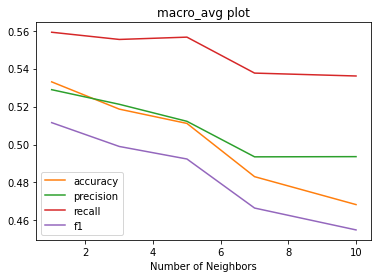

In [41]:
evaluation_results_part1 = []
for prediction in predictions:
  metric = compute_performance_metrics(prediction,truth)
  evaluation_results_part1.append(metric)
plot_evaluations(evaluations=evaluation_results_part1)

In [8]:

accuracies = []
confusion_matrices = []
classification_reports = []
evaluations_part2 = {}
predictions = []
def execute_part2():
  from sklearn import neighbors
  training_dataset_filepath = get_path('training_dataset')
  training_dataset = load_dataset(training_dataset_filepath)

  testing_dataset_filepath = get_path('testing_dataset')
  testing_dataset = load_dataset(testing_dataset_filepath)
  
  processed_training_dataset = preprocess_dataset(training_dataset)
  processed_testing_dataset = preprocess_dataset(testing_dataset)

  processed_training_dataset_filepath = get_path('processed_training_dataset_part1')
  save_dataset(processed_training_dataset,processed_training_dataset_filepath)

  processed_testing_dataset_filepath = get_path('processed_testing_dataset_part1')
  save_dataset(processed_testing_dataset,processed_testing_dataset_filepath)

  processed_train_tweets = processed_training_dataset['Tweet']
  processed_test_tweets = processed_testing_dataset['Tweet']

  unique_words_dict = create_unique_words_dict(processed_training_dataset)
  save_unique_words_dict(unique_words_dict)
  unique_words_df_path  = get_path('unique_words_dict')
  unique_words_df = load_unique_words_df(unique_words_df_path)
  unique_words_dict = convert_unique_words_df_into_unique_words_dict(unique_words_df)
  index_dict = create_index_dict_from_unique_words_dict(unique_words_dict)
  save_index_dict(index_dict)
  ks = [1,3,5,7,10]
  initial_start_time = datetime.datetime.now()
  X = create_bow_for_tweets(processed_train_tweets,index_dict)
  Y = create_labels_array_from_sentiments(processed_training_dataset['Sentiment'])
  Z = create_bow_for_tweets(processed_test_tweets,index_dict)
  Z_true = create_labels_array_from_sentiments(processed_testing_dataset['Sentiment'])

  print('running knn part 2')
  print("Evaluation here is done based scikit functions")
  for k in ks:
    start_time = datetime.datetime.now()
    clf = neighbors.KNeighborsClassifier(k, weights='uniform',metric = 'euclidean',algorithm='brute')
    clf.fit(X,Y)
    Z_pred = clf.predict(Z)
    predictions.append(Z_pred)
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(Z_true, Z_pred)
    print('----------------------------------------------------------------------')

    print('Accuracy for k = '+ str (k) + ' is ' + str (accuracy) )
    accuracies.append (accuracy)
    
    from sklearn.metrics import classification_report
    target_names = ['negative', 'neutral', 'positive']
    classification_rep = classification_report(Z_true, Z_pred, target_names=target_names)
    print('classification report for k = '+ str (k) + ' is ') 
    print(classification_rep )
    classification_reports.append(classification_rep)
    from sklearn.metrics import confusion_matrix
    knn_confusion_matrix = confusion_matrix(Z_true, Z_pred)
    confusion_matrices.append(knn_confusion_matrix)
    print('confusion matrix for k = '+ str (k) + ' is ')
    print(knn_confusion_matrix) 
    finish_time = datetime.datetime.now() - start_time
    print('finished' + str (k) + 'nn part2 in ' + str (finish_time))
    print('----------------------------------------------------------------------')

    
  finish_time = datetime.datetime.now() - initial_start_time
  print('finished knn part2 in ' + str (finish_time))
  evaluations_part2['accuracy'] = accuracies
  evaluations_part2['classification_report'] = classification_reports
  evaluations_part2['confusion_matrix'] = confusion_matrices
  return predictions,Z_true
#takes about 5 min
predictions,truth = execute_part2()
 

/content/a1_data/processed_training_dataset_part1.csv saved successfully
/content/a1_data/processed_testing_dataset_part1.csv saved successfully
unique words dict saved successfully at /content/a1_data/unique_words_dict.csv
loaded unique_words_dict at /content/a1_data/unique_words_dict.csv
index dict saved successfully at /content/a1_data/index_dict.csv
running knn part 2
----------------------------------------------------------------------
Accuracy for k = 1 is 0.5213967819239986
classification report for k = 1 is 
              precision    recall  f1-score   support

    negative       0.83      0.50      0.62      1834
     neutral       0.30      0.53      0.38       615
    positive       0.39      0.59      0.47       472

    accuracy                           0.52      2921
   macro avg       0.50      0.54      0.49      2921
weighted avg       0.64      0.52      0.55      2921

confusion matrix for k = 1 is 
[[918 634 282]
 [127 328 160]
 [ 66 129 277]]
finished1nn part2 i

Evaluation here is done self implemented functions
----------------------------------------------------------------------
accuracy for k=1 is 0.5213967819239986
macro_avg precision for k=1 is 0.5040605144232644
macro_avg recall for k=1 is 0.5402476654611471
macro_avg f1 for k=1 is 0.49103669280275414
confusion_matrix for k=1
[[918, 127, 66], [634, 328, 129], [282, 160, 277]]
----------------------------------------------------------------------
----------------------------------------------------------------------
accuracy for k=3 is 0.5539198904484766
macro_avg precision for k=3 is 0.5224142020358125
macro_avg recall for k=3 is 0.5701699212988656
macro_avg f1 for k=3 is 0.5187196858009439
confusion_matrix for k=3
[[992, 133, 60], [549, 318, 104], [293, 164, 308]]
----------------------------------------------------------------------
----------------------------------------------------------------------
accuracy for k=5 is 0.5292707976720301
macro_avg precision for k=5 is 0.51308263903

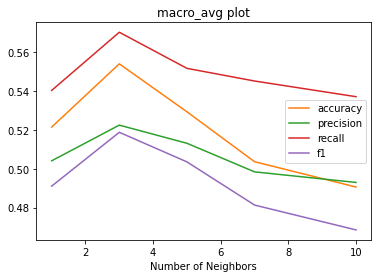

In [24]:
evaluation_results_part2 = []
for prediction in predictions:
  metric = compute_performance_metrics(prediction,truth)
  evaluation_results_part2.append(metric)
plot_evaluations(evaluations=evaluation_results_part2)


In [25]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz


--2020-10-16 10:29:39--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.114.197
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.114.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  35.0MB/s    in 46s     

2020-10-16 10:30:25 (34.3 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [26]:
from gensim.models import KeyedVectors

word2vec = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)




/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [27]:
def extract_features(list_of_words):
  words = [word for word in list_of_words if word in word2vec.vocab]
  if len(words) == 0:
    return 0
  return np.mean(word2vec[words])

def filter_tweet_words_not_in_word2vec_vocab(words):
  filtered_words = []
  for word in words:
    index = word2vec.vocab.get(word,-1)
    if index is not -1:
      filtered_words.append(word)
  return filtered_words

def compute_distance_matrix_part31(test_tweets,train_tweets):
  distance_matrix = []
  filtered_train_words = []
  filtered_test_words = []
  train_features =  []
  test_features =  []

  for train_tweet in train_tweets:
    train_words_in_tweet = train_tweet.split()
    filtered_train_words = filter_tweet_words_not_in_word2vec_vocab(train_words_in_tweet)
    extracted_features = extract_features(filtered_train_words)
    train_features.append([extracted_features])


  for test_tweet in test_tweets:
    test_words_in_tweet = test_tweet.split()
    filtered_test_words = filter_tweet_words_not_in_word2vec_vocab(test_words_in_tweet)
    extracted_features = extract_features(filtered_test_words)
    test_features.append([extracted_features])

  train_features =  np.array(train_features)
  test_features =  np.array(test_features)
  dm = distance.cdist(test_features,train_features, 'euclidean')
  return dm

def find_kNN_part31_v1(test_tweets,train_tweets,distance_matrix,k=0):
  nearest_neighbors_distance_vector =[]
  nearest_neighbors_distance_matrix =[]

  start_time = datetime.datetime.now()

  print('computing distance_part1')

  # distance_matrix = compute_distance_matrix_part31(test_tweets,train_tweets)
  finish_time = datetime.datetime.now() - start_time
  columns = create_neighbor_id_columns(len(distance_matrix[0]))
  distance_matrix_df = pd.DataFrame(distance_matrix,columns=columns)
  nearest_neighbors_indices = []
  
  for index,row in distance_matrix_df.iterrows():
    nearest_neighbors_indices.append(np.argsort(row)[0:k])
  return nearest_neighbors_indices

In [33]:
accuracies =  []
confusion_matrices =  []
classification_reports = []
evaluations_part31 = {}
predictions = []
def execute_part31():
  training_dataset_filepath = get_path('training_dataset')
  training_dataset = load_dataset(training_dataset_filepath)

  testing_dataset_filepath = get_path('testing_dataset')
  testing_dataset = load_dataset(testing_dataset_filepath)
  
  processed_training_dataset = preprocess_dataset(training_dataset)
  processed_testing_dataset = preprocess_dataset(testing_dataset)

  processed_training_dataset_filepath = get_path('processed_training_dataset_part1')
  save_dataset(processed_training_dataset,processed_training_dataset_filepath)

  processed_testing_dataset_filepath = get_path('processed_testing_dataset_part1')
  save_dataset(processed_testing_dataset,processed_testing_dataset_filepath)

  processed_train_tweets = processed_training_dataset['Tweet']
  processed_test_tweets = processed_testing_dataset['Tweet']
  
  num_test_tweets = len(testing_dataset['Tweet'])
  training_sentiments= training_dataset['Sentiment']

  
  ks = [1,3,5,7,10]
  start_time = datetime.datetime.now()
  num_test_tweets = len(processed_test_tweets)
  Z_true = np.array(create_labels_array_from_sentiments(processed_testing_dataset['Sentiment']))
  distance_matrix = compute_distance_matrix_part31(processed_test_tweets,processed_train_tweets)

  print('running knn part 31')
  for k in ks:
    tweets_nearest_neighbors_indices = find_kNN_part31_v1(processed_test_tweets,processed_train_tweets,distance_matrix,k=k)
  
    neighbor_id_columns = create_neighbor_id_columns(len(tweets_nearest_neighbors_indices[0]))
    knn_df = pd.DataFrame(tweets_nearest_neighbors_indices,columns = neighbor_id_columns)
    path = get_path("base") + str (k) +"nn_df_part31.csv" 
  
    save_knn_df(knn_df,path)
    
    Z_pred= np.array(get_kNN_sentiments_predictions(num_test_tweets,training_sentiments,knn_df))
    predictions.append(Z_pred)
    finish_time = datetime.datetime.now() - start_time

    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    accuracies.append(accuracy_score(Z_true, Z_pred))
    confusion_matrices.append(confusion_matrix(Z_true, Z_pred))
    target_names = ['negative', 'neutral', 'positive']

    classification_reports.append(classification_report(Z_true, Z_pred, target_names=target_names))
    print('finished' + str (k) + 'nn part2 in ' + str (finish_time)) 
  finish_time = datetime.datetime.now() - start_time
  print('finished knn part2 in ' + str (finish_time))
  evaluations_part31['accuracy'] = accuracies
  evaluations_part31['classification_report'] = classification_reports
  evaluations_part31['confusion_matrix'] = confusion_matrices
  return predictions,Z_true
#takes about 20 min
predictions,truth = execute_part31()

/content/a1_data/processed_training_dataset_part1.csv saved successfully
/content/a1_data/processed_testing_dataset_part1.csv saved successfully
running knn part 31
computing distance_part1
finished1nn part2 in 0:03:54.344216
computing distance_part1
finished3nn part2 in 0:07:48.755772
computing distance_part1
finished5nn part2 in 0:11:43.979439
computing distance_part1
finished7nn part2 in 0:15:39.870465
computing distance_part1
finished10nn part2 in 0:19:34.710780
finished knn part2 in 0:19:34.717664


Evaluation here is done self implemented functions
----------------------------------------------------------------------
accuracy for k=1 is 0.4833960972269771
macro_avg precision for k=1 is 0.35675512530503645
macro_avg recall for k=1 is 0.3570207035591602
macro_avg f1 for k=1 is 0.35685907260488386
confusion_matrix for k=1
[[1173, 362, 277], [375, 152, 108], [286, 101, 87]]
----------------------------------------------------------------------
----------------------------------------------------------------------
accuracy for k=3 is 0.5285861006504622
macro_avg precision for k=3 is 0.36965281860113014
macro_avg recall for k=3 is 0.363057947234741
macro_avg f1 for k=3 is 0.36285926377465477
confusion_matrix for k=3
[[1348, 427, 316], [276, 124, 84], [210, 64, 72]]
----------------------------------------------------------------------
----------------------------------------------------------------------
accuracy for k=5 is 0.563163300239644
macro_avg precision for k=5 is 0.3836679540

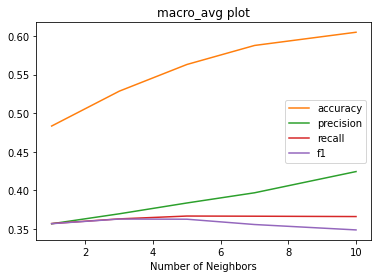

In [34]:
evaluation_results_part31 = []
for prediction in predictions:
  metric = compute_performance_metrics(prediction,truth)
  evaluation_results_part31.append(metric)
plot_evaluations(evaluations=evaluation_results_part31)

In [36]:
def compute_word2vec_embeddings_part32(train_tweets):
  filtered_train_words = []
  train_features =  []
  for train_tweet in train_tweets:
    train_words_in_tweet = train_tweet.split()
    filtered_train_words = filter_tweet_words_not_in_word2vec_vocab(train_words_in_tweet)
    train_features.append([extract_features(filtered_train_words)])

  train_features =  np.array(train_features)
  return train_features

In [37]:
predictions= []
Z_true = None
accuracies = {}
confusion_matrices = {}
classification_reports = {}
def execute_part32():
  from sklearn import neighbors
  training_dataset_filepath = get_path('training_dataset')
  training_dataset = load_dataset(training_dataset_filepath)

  testing_dataset_filepath = get_path('testing_dataset')
  testing_dataset = load_dataset(testing_dataset_filepath)
  
  processed_training_dataset = preprocess_dataset(training_dataset)
  processed_testing_dataset = preprocess_dataset(testing_dataset)

  processed_training_dataset_filepath = get_path('processed_training_dataset_part1')
  save_dataset(processed_training_dataset,processed_training_dataset_filepath)

  processed_testing_dataset_filepath = get_path('processed_testing_dataset_part1')
  save_dataset(processed_testing_dataset,processed_testing_dataset_filepath)

  processed_train_tweets = processed_training_dataset['Tweet']
  processed_test_tweets = processed_testing_dataset['Tweet']
  
  num_test_tweets = len(testing_dataset['Tweet'])
  training_sentiments= training_dataset['Sentiment']

  
  ks = [1,3,5,7,10]
  start_time = datetime.datetime.now()
  num_test_tweets = len(processed_test_tweets)
  X = np.array(compute_word2vec_embeddings_part32(processed_train_tweets),dtype=float)
  Y = np.array(create_labels_array_from_sentiments(processed_training_dataset['Sentiment']))
  Z = np.array(compute_word2vec_embeddings_part32(processed_test_tweets))
  print('running knn part 32')
  Z_true = np.array(create_labels_array_from_sentiments(processed_testing_dataset['Sentiment']))
  for k in ks:
    clf = neighbors.KNeighborsClassifier(k, weights='uniform',metric = 'euclidean',algorithm='brute')
    clf.fit(X,Y)
    Z_pred = clf.predict(Z)
    predictions.append(Z_pred)

    from sklearn.metrics import accuracy_score
    print('accuracy for k=' + str (k))
    print(accuracy_score(Z_true, Z_pred))
    from sklearn.metrics import classification_report
    target_names = ['negative', 'neutral', 'positive']
    print('classification report for k=' + str (k))
    print(classification_report(Z_true, Z_pred, target_names=target_names))
    from sklearn.metrics import confusion_matrix
    print('confusion matrix for k=' + str (k))
    print(confusion_matrix(Z_true, Z_pred))
    accuracies[k] = accuracy_score(Z_true, Z_pred)
    finish_time = datetime.datetime.now() - start_time
  print('finished knn part31 in ' + str (finish_time))
  return predictions, Z_true

predictions, truth = execute_part32()
    


/content/a1_data/processed_training_dataset_part1.csv saved successfully
/content/a1_data/processed_testing_dataset_part1.csv saved successfully
running knn part 32
accuracy for k=1
0.4827114002054091
classification report for k=1
              precision    recall  f1-score   support

    negative       0.65      0.64      0.64      1834
     neutral       0.24      0.24      0.24       615
    positive       0.19      0.19      0.19       472

    accuracy                           0.48      2921
   macro avg       0.36      0.36      0.36      2921
weighted avg       0.49      0.48      0.48      2921

confusion matrix for k=1
[[1171  377  286]
 [ 363  150  102]
 [ 278  105   89]]
accuracy for k=3
0.5713796644984594
classification report for k=3
              precision    recall  f1-score   support

    negative       0.65      0.82      0.72      1834
     neutral       0.29      0.16      0.21       615
    positive       0.24      0.12      0.16       472

    accuracy            

Evaluation here is done self implemented functions
----------------------------------------------------------------------
accuracy for k=1 is 0.4827114002054091
macro_avg precision for k=1 is 0.35672394066477303
macro_avg recall for k=1 is 0.35698561791728484
macro_avg f1 for k=1 is 0.3568303409705837
confusion_matrix for k=1
[[1171, 363, 278], [377, 150, 105], [286, 102, 89]]
----------------------------------------------------------------------
----------------------------------------------------------------------
accuracy for k=3 is 0.5713796644984594
macro_avg precision for k=3 is 0.3920572422581327
macro_avg recall for k=3 is 0.36909973032968785
macro_avg f1 for k=3 is 0.3643557785809077
confusion_matrix for k=3
[[1512, 469, 358], [190, 101, 58], [132, 45, 56]]
----------------------------------------------------------------------
----------------------------------------------------------------------
accuracy for k=5 is 0.5956864087641218
macro_avg precision for k=5 is 0.412253797

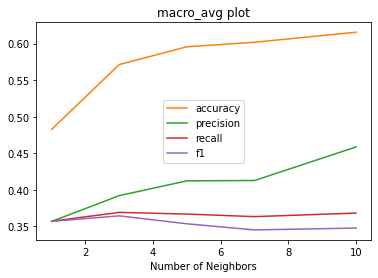

In [38]:
evaluation_results_part32 = []
for prediction in predictions:
  metric = compute_performance_metrics(prediction,truth)
  evaluation_results_part32.append(metric)
plot_evaluations(evaluations=evaluation_results_part32)